Exercice 2

D'abord, on doit charger les données:

In [89]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

with h5py.File("data_ex3.h5", "r") as f:
    x = np.array(f["x"])
    y = np.array(f["y"])

Ensuite, on écrit la fonction de régression linéaire:

In [90]:

def my_lin_reg(x, y=None):
    if y is None:
        x = np.array(x)
        if x.shape[1] != 2:
            raise ValueError("Le tableau doit avoir deux colonnes [x, y]")
        x, y = x[:, 0], x[:, 1]
    else:
        x, y = np.array(x), np.array(y)

    x_mean, y_mean = np.mean(x), np.mean(y)
    a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - a * x_mean

    y_pred = a * x + b
    residuals = y - y_pred
    return a, b, residuals, y_pred

Puis, on inclus les erreurs possibles:

In [91]:

a, b, residuals, y_pred = my_lin_reg(x, y)

# Conversion en centimètres (si x et y sont en m)
errors_cm = residuals * 1


Enfin, on décrit l'apparence des graphiques souhaitée:

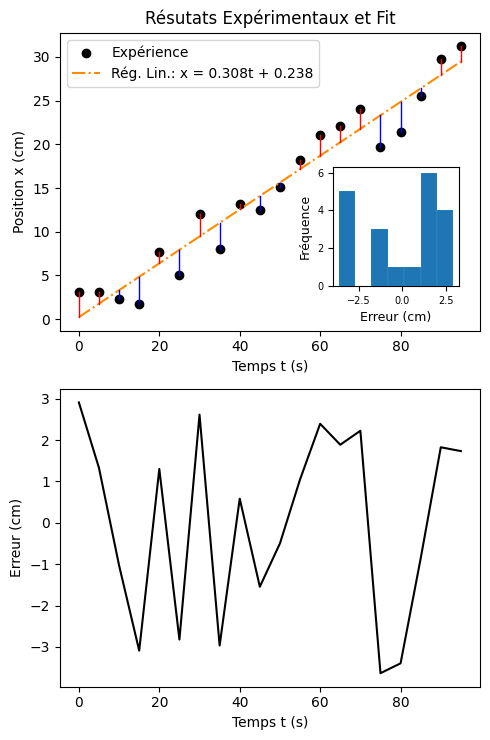

In [92]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[5, 7.5])

# ---------- GRAPHIQUE PRINCIPAL ----------
ax1.scatter(x, y, color="black", label="Expérience", zorder=1)

# Droite de régression en pointillé
ax1.plot(x, y_pred, linestyle="-.", color="darkorange", label=f"Rég. Lin.: x = {a:.3f}t + {b:.3f}")

# Lignes verticales rouges/bleues selon la position des points
for xi, yi, ypi in zip(x, y, y_pred):
    if yi > ypi:
        ax1.plot([xi, xi], [ypi, yi], color="red", linewidth=1)
    else:
        ax1.plot([xi, xi], [yi, ypi], color="blue", linewidth=1)

# Mise en forme du graphique principal
ax1.set_title("Résutats Expérimentaux et Fit")
ax1.set_xlabel("Temps t (s)")
ax1.set_ylabel("Position x (cm)")
ax1.legend()
ax1.grid(False)

# ---------- GRAPHIQUE ENCASTRÉ (inset) ----------
# Petit graphique en bas à droite : histogramme des erreurs
inset_ax = ax1.inset_axes([0.65, 0.15, 0.3, 0.4])  # [x0, y0, width, height]
inset_ax.hist(errors_cm, bins=7, color=(30/255, 119/255, 180/255) , alpha=1, edgecolor="white", linewidth=0.05)
inset_ax.set_xlabel("Erreur (cm)", fontsize=9)
inset_ax.set_ylabel("Fréquence", fontsize=9)
inset_ax.tick_params(axis='both', labelsize=7)
inset_ax.grid(False)
inset_ax.set_xticks([-2.5, 0, 2.5])

# ---------- GRAPHIQUE DU BAS ----------
# Erreurs en fonction du temps
ax2.plot(x, errors_cm, linestyle='-', color="black")
ax2.set_xlabel("Temps t (s)")
ax2.set_ylabel("Erreur (cm)")
ax2.grid(False)

# Ajustement global
plt.tight_layout()
plt.show()
